# ML Preprocessing

(NOTE: This is for lesson purpose only.)

Supervised Learning
- <i>The goal of supervised learning problems is to be able to make predictions based on the dataset you are provided. Which model performs well on new data.
- Has a target variable to learn patterns, fitting a “if this - then that” pattern.

## Feature Matrix and Target Vector

In [ ]:
# Target
target = 'The target is the column we are trying to predict.'

# Target Vector
# A target vector is one dimensional and is the column you want to predict.
# Returns type as "Series"
y = df[target]

# Feature Matrix
# A features matrix is a two-dimensional grid of data 
# where rows representsamples and columns represent features.
# returns type as "DataFrame"
X = df.drop(columns = target)

## Model Validation
Model validation is referred to as the process where a trained model is evaluated with a testing data set. The model validation procedure used in this section is called train test split. Below is how train test split works.
- Split the dataset into two separate datasets: a training set and a testing set. The default split results in about 75% of the data going to your training set and about 25% going to your test set.
- Train the model on the training set only!
- Test the model on the testing set and evaluate the performance to simulate how it would do on new data that it did NOT train on.

In [ ]:
# Import the TTS from sklearn
from sklearn.model_selection import train_test_split

# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Four New Variables:

From our original X dataframe, we get two new dataframes:

<b> X_train </b> is the data we will use to train the model and contains only the features </br>
<b> X_test </b> is the data we set aside for testing (evaluating) our model and contains only features

From our original y series, we get two new series:

<b>y_train</b> contains the target values for the data corresponding to the X_train features</br>
<b>y_test</b> contains the target values for the data we have set aside for testing corresponding to the X_test feautres

## Missing Values
Instantiate an Imputer </br>
Strategies:
1. Mean
2. Median
4. Most Frequent
4. Constant (fill_value = 'Value')

In [ ]:
# Import SimpleImputer from sklearn
from sklearn.imputer import SimpleImputer

# Imputer using mean value
mean_imputer = SimpleImputer(strategy = 'mean')

#Imputer using median value
median_imputer = SimpleImputer(strategy = 'median')

#Imputer using most frequent values
freq_imputer = SimpleImputer(strategy = 'most_frequent')

#Imputer using "missing" as value
missing_imputer = SimpleImputer(strategy = 'constant', fill_value = 'Missing')

Three Types of Features
1. <b>Numeric Features</b> are integers or floats that represent a quantity. They can also be referred to as quantitative features.
2. <b>Ordinal Features</b> are categories that represent different classes and that have a distinct ordering. They can be strings or integers if the integer represents an ordered class.
3.<b> Categorical Features</b> (nominal) are categories that represent different classes. They are not ordered.They can be strings or integers if the integer represents a non-ordered class.

## Transforming Features for Machine learning

In order for features to be interpreted by a machine learning algorithm, the data must be in a numeric form (integers or floats).

<b>Transforming Numeric Features 

These are already in a numeric format so can be used without further transformation. However, it is very common and sometimes required, to scale numerical features.

<b>Transforming Ordinal Features

If they are strings, they will need to be mapped to numeric values representing the order of the classes. </br>
0 is small, 1 is medium, 2 is large, and 3 is extra large.

<b>Transforming Categorical (Nominal) Features

You need to be careful when your categories are unordered. It is not sufficient to simply map each class to a number as can be done with ordinal features. This is because machine learning models will interpret higher numbers as having a higher value than lower numbers. To deal with this, we can one-hot encode our categories. What this does is creates a binary column for each class in the column.

### Standardizing Data 
When the scaler fits on data it calculates the means and standard deviations of each feature. Then the scaler can be used to transform both the training and test sets based on the calculations done during the fit step. This means that the average and variance (standard deviation) will be calculated using only the training data because we want to keep information in the test data, including information about means and variances, reserved for only the final model evaluation. </br> The scaling of target values (y) is generally not required.

In [ ]:
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# instantiate scaler
scaler = StandardScaler()

### One-Hot Encoding
In order to represent non-ordered, or 'nominal' features, we do the following:
1. Create a new column for every category present in the feature.

2. Set the value of each of the new columns to 1 if that row corresponds to the original category.

3. Set the value of each of the new columns to 0 if they do not.

4. Remove the original column.
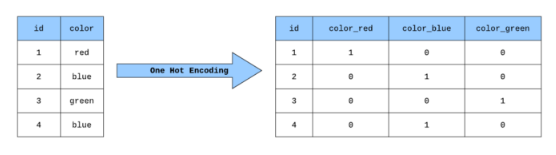

sparse = False

By default, it will return what is called a 'sparse matrix'. This is a form of data compression used when arrays are mostly filled with 0s. Instead of keeping track of so many 0s, the compressed version just has information about where the data is NOT 0. This is great for saving memory! But not great if we want to use the data in a new dataframe. We can get OneHotEncoder to return a normal array that is compatible with pandas, called a ‘Dense’ array by specifying ‘sparse=False’ inside our OneHotEncoder.

handle_unknown ='ignore'

OneHotEncoder is a transformer like StandardScaler. When we use it we will:

1. Fit the OneHotEncoder ONLY on the categorical training data.

2. Transform the categorical training data to a one-hot encoded form.

3. Transform the categorical testing data to a one-hot encoded form.

In [ ]:
# Import One-Hot Encoder from sklearn
from sklearn.preprocessing import OneHotEncoder

# Converting string values to numbers
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

### Ordinal Encoding
If there is an order to the words, such as 'Low', 'Medium', 'High', then we can encode them as ordered numbers: {'Low':0, 'Medium': 1, 'High': 2).

In [ ]:
# Import Ordinal Encoder from sklearn
from sklearn.preprocessing import OrdinalEncoder

# Make a list for Ordinal Column features
List1 = ['Low', 'Medium', 'High', 'Very High']
List2 = ['Small', 'Medium', 'Large']

# Instantiate Ordinal Encoders and scaler
ordinal_encoder = OrdinalEncoder(categories = [List1, List2])
scaler2 = StandardScaler()

# Pipeline
A pipeline contains multiple transformers (or even models!) and performs operations on data IN SEQUENCE. </br>
When data is transformed using a pipeline, the data is transformed by the first transformer first, the second transformer second, etc. A pipeline can contain any number of transformers as long as they have .fit() and .transform() methods. These are called 'steps'.</br>
The important thing to remember is that pipelines are ordered, so the order you use to build them matters.

<b>Why Should I Use Pipelines for Machine Learning?
Reasons to use pipelines:

1. Pipelines use less code than doing each transformer individually. Since each transformer is fit in a single .fit() call, and the data is transformed by all of the transformers in the pipeline in a single .transform() call, pipelines use significantly less code.
2. Pipelines make your preprocessing workflow easier to understand. By reducing the code and displaying a diagram of the pipeline you can show your readers clearly how your data is being transformed before modeling.
3. Pipelines are easy to use in production models. When you are ready to deploy your model to use in new data, a preprocessing pipeline can ensure that new data can be quickly and easily preprocessed for modeling.
4. Pipelines can prevent data leakage. Pipelines are designed to only be fit on training data. Later you will learn a technique called 'cross-validation' and pipelines will simplify performing this without leaking data.

In [ ]:
# Import pipeline from sklearn
from sklearn.pipeline import make_pipeline

# combine the imputer and the scaler into a pipeline
# Imputer first
numerical_pipeline = make_pipeline(median_imputer, scaler)
nonimal_pipeline = make_pipeline(missing_imputer, ohe)
ordinal_pipeline = make_pipeline(freq_imputer, ordinal_encoder, scaler2)

# Make tuples
numerical_tuples = (numerical_pipeline, numerical_colums)
nominal_pipeline = (nominal_pipeline, nominal_columns)
ordinal_pipeline = (ordinal_pipeline, ordinal_columns)

# Column Transformer

In [ ]:
# Import Column Transformer from sklearn
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(numerical_tuples, nominal_pipeline, 
                                       ordinal_pipeline, remainder='drop)